<h1>Linear Regression</h1>
<p>Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.</p>

<h3>In the context of the given dataset:</h3>

<p>Dependent Variable (Target): This is the variable we want to predict, which in this case is Scores.
Independent Variable (Feature): This is the variable we use to make the prediction, which in this case is Hours.
The goal of linear regression analysis is to model the relationship between these two variables by fitting a linear equation to observed data. The linear equation typically looks like this:

Scores=m*Hours+c


Where:

c is the y-intercept of the regression line.
m is the slope of the regression line.
</p>

In [28]:
## Importing all libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<h3>Data Loading</h3>
<p>Load the dataset from the url using pandas</p>

In [44]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [45]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<h3>EDA</h3>
<p>Perform the EDA on data</p>

In [20]:
# Basic statistics
summary_statistics = data.describe()
print("Summary Statistics:\n", summary_statistics)

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Set the style of the visualization
sns.set(style="whitegrid")

Summary Statistics:
            Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

Missing Values:
 Hours     0
Scores    0
dtype: int64


<h3>Data Visualisation</h3>
<p>Visualise the dataset</p>

In [ ]:
# Histogram of Hours
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Hours'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours')
plt.ylabel('Frequency')

# Histogram of Scores
plt.subplot(1, 2, 2)
sns.histplot(data['Scores'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Find the correlation between Scores and Hours

In [46]:
# Correlation
correlation = data.corr().iloc[0, 1]
print("\nCorrelation between Hours Studied and Scores:", correlation)


Correlation between Hours Studied and Scores: 0.9761906560220883


Let's plot our data points on 2-D graph to check relationship of the dataset

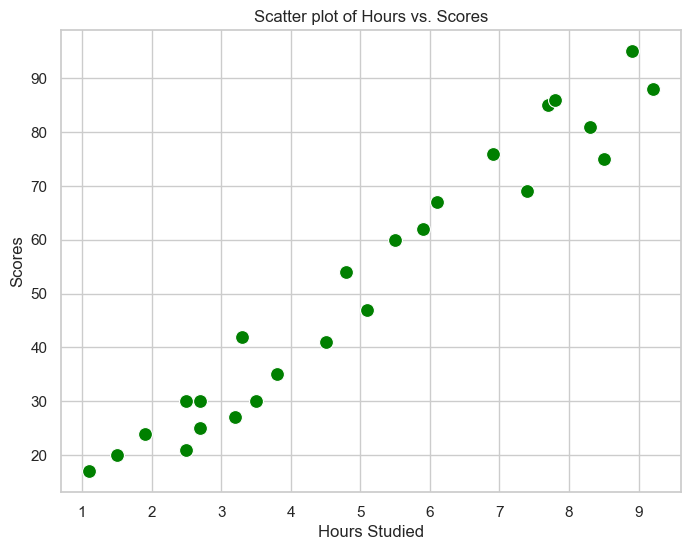

In [23]:
# Plotting the distribution of scores Hours vs. Scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours', y='Scores', data=data, color='green', s=100)
plt.title('Scatter plot of Hours vs. Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

<h2>Preparing the data</h2>
<p>
    <ul>Separate the features (Hours) and target (Scores).</ul>
    <ul>Use Scikit-Learn's built-in train_test_split() method to split the data in training and test set</ul>
</p>

In [29]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

<h3>Model Training</h3>
<p>Train the model using inbuilt sciket learn library</p>

In [47]:

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [48]:
print("Regressor_Coeffecient : {}".format(regressor.coef_))
print("Regressor_Intercept : {}".format(regressor.intercept_))

Regressor_Coeffecient : [9.68207815]
Regressor_Intercept : 2.826892353899737


<h3>Model Visualisation</h3>
<p>Draw the regression line</p>

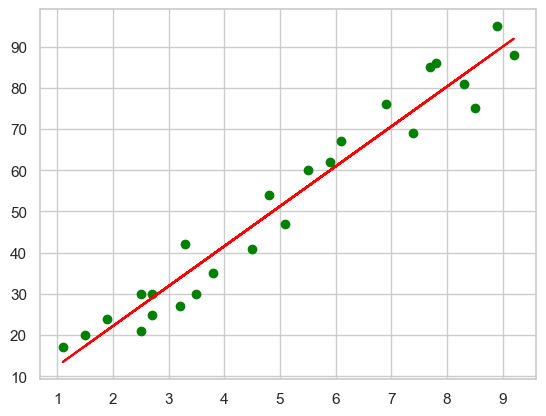

In [33]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, color = "green")
plt.plot(X, line, color="red");
plt.show()

In [49]:
# Predicting the scores
y_pred = regressor.predict(X_test) 

<h3>Model Test</h3>
<p>Predict the model and find difference</p>

In [38]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


<h3>Model Evaluation</h3>
<p>The final step to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.We have chosen the mean square error,mean_squared_error, root mean square error and r2 scores. There are many such metrics.</p>

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")
